# Use different classification models (K-NN, Logistic and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report

### loading Dataset and each column description is specified below
- **ID** - Customer ID
- **Age** - Customer's age in completed years.
- **Experience** - years of professional experience.
- **Income** - Annual income of the customer.
- **ZIPCode** - Home Address ZIP code.
- **Family** - Family size of the customer.
- **CCAvg** - Avg. spending on credit cards per month.
- **Education** - Education Level :
                1. Undergrad 
                2. Graduate 
                3. Advanced/Professional
- **Mortgage** - Value of house mortgage if any.
- **Personal Loan** - Did this customer accept the personal loan offered in the last campaign?
- **Securities Account** - Does the customer have a securities account with the bank?
- **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?
- **Online** - Does the customer use internet banking facilities?
- **CreditCard** - Does the customer use a credit card issued by UniversalBank?

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#'/content/drive/My Drive/Colab Notebooks/

In [3]:
loan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

## Head and Tail of dataset

In [4]:
loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
loan.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Shape of Dataset

In [6]:
loan.shape

(5000, 14)

> Original dataset has **14 attributes** and **5000 records**.

### To check whether dataset contains null values

In [7]:
print(loan.isna().sum().sum())
print(loan.isnull().sum().sum())

0
0


> No columns have null data in the file

### From given dataset we can create new features that will help to predict the likelihood of a liability customer buying personal loans 

> By Looking at loan dataset and general concept we can create new attribute such as dependancy (Income/Family Size) and Monthly balance((Income/12) - CCAvg)

In [8]:
loan['Dependency'] = loan['Income']/loan['Family']
loan['Bal'] = (loan['Income']/12) - (loan['CCAvg'])

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Dependency            5000 non-null float64
Bal                   5000 non-null float64
dtypes: float64(3), int64(13)
memory usage: 625.1 KB


### Using Describe function for stastical analysis of dataset

> We will drop **'ID'** and **'ZIP Code'** columns as these column are not required to check **5 point summary statistics**.

In [10]:
loan.drop(['ID','ZIP Code'],axis = 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.000000,35.0,45.000000,55.0,67.000000
Experience,5000.0,20.104600,11.467954,-3.000000,10.0,20.000000,30.0,43.000000
Income,5000.0,73.774200,46.033729,8.000000,39.0,64.000000,98.0,224.000000
Family,5000.0,2.396400,1.147663,1.000000,1.0,2.000000,3.0,4.000000
CCAvg,5000.0,1.937938,1.747659,0.000000,0.7,1.500000,2.5,10.000000
Education,5000.0,1.881000,0.839869,1.000000,1.0,2.000000,3.0,3.000000
Mortgage,5000.0,56.498800,101.713802,0.000000,0.0,0.000000,101.0,635.000000
Personal Loan,5000.0,0.096000,0.294621,0.000000,0.0,0.000000,0.0,1.000000
Securities Account,5000.0,0.104400,0.305809,0.000000,0.0,0.000000,0.0,1.000000
CD Account,5000.0,0.060400,0.238250,0.000000,0.0,0.000000,0.0,1.000000


In [11]:
loan.Experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

### Observation from the above Describe and value_counts function

+ Minimum value in experience column is -3 and we can notice there are total 33, 15 and 4 values of -1, -2, -3 in experience columns which need to be corrected for analysis

### We will be replacing the negative experience values with Absolute value.

In [12]:
neg_exp = list(loan.Experience[loan.Experience < 0])
loan.Experience.replace(neg_exp,np.abs(neg_exp),inplace = True)

#### 5 point summary statistics for Experience column

In [13]:
loan.Experience.describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

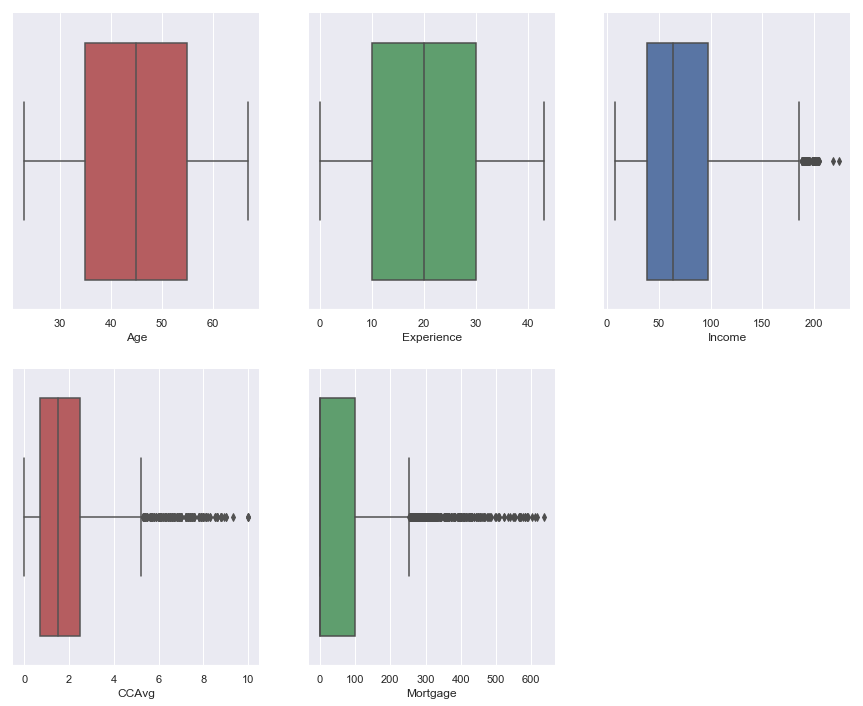

In [14]:
sns.set(style="darkgrid")
#Set up the matplotlib figure
f, axes = plt.subplots(2,3, figsize=(15,12))
sns.despine(left=True)
sns.boxplot(loan.Age, color="r", ax=axes[0,0],)
sns.boxplot(loan.Experience, color="g", ax=axes[0,1])
sns.boxplot(loan.Income, color="b", ax=axes[0,2])
sns.boxplot(loan.CCAvg, color="r", ax=axes[1,0])
sns.boxplot(loan.Mortgage, color="g", ax=axes[1,1])
axes[1,2].remove();

+ Most of the customers age fall in the **age** range of **35 to 55 yrs** and their **experience** falls in the range of **10 to 30 years** and most earn an **income** between **40 dollor to 100 dollor**.

+ Also their Average spending on credit cards per month lies between **0.5 to 2.5** dollor. 
+ Maximum number of outliers can be seen in CCAvg and Mortgage.

### Visual analysis for newly created feature ("Dependency", "Bal")

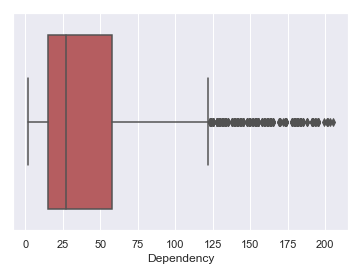

In [15]:
sns.boxplot(loan.Dependency, color="r");

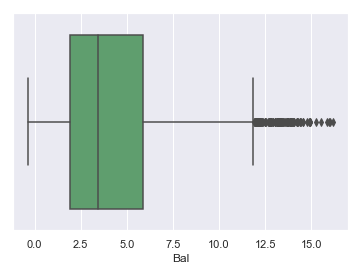

In [16]:
sns.boxplot(loan.Bal, color="g");

> + Most of the customers having dependency between 15 to 58 i.e. we can say that per head monthly income of family is ranging between 15 to 58$. 
> + Also their savings after montly expenses on saving is ranging maximum between 1.25 to 6.


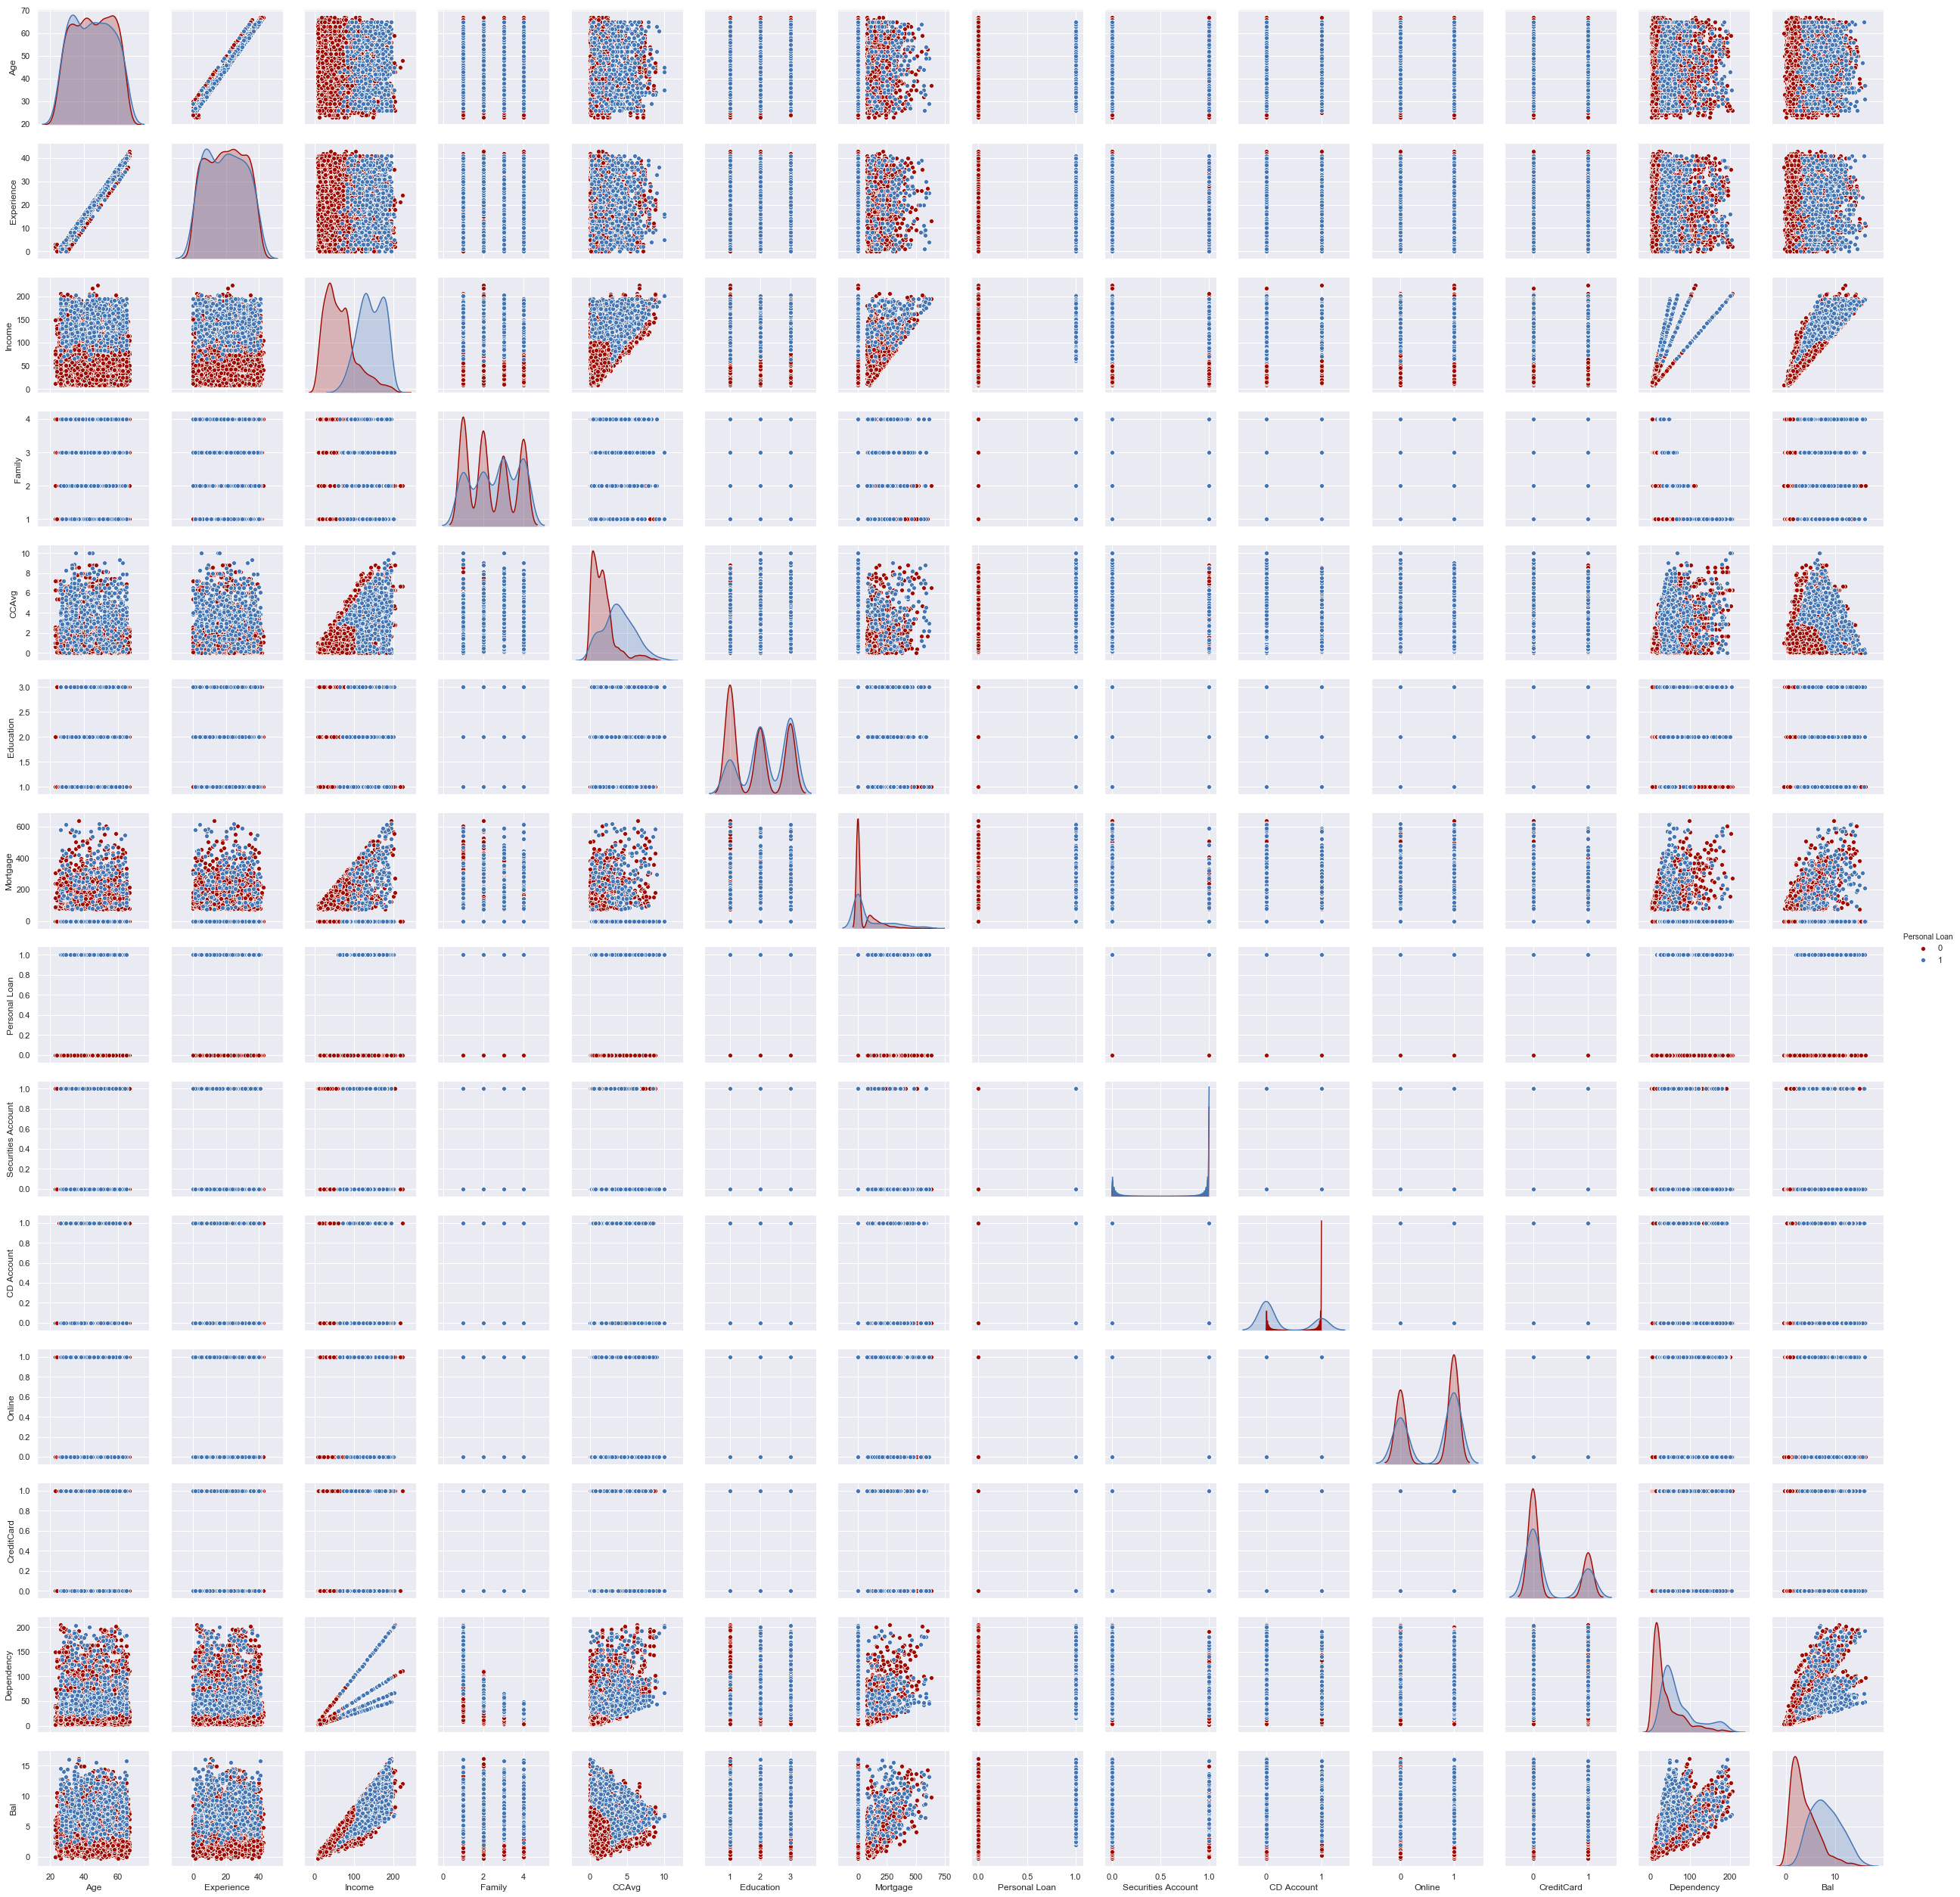

In [17]:
# Create an array with the colors you want to use
colors = ["#9F0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.pairplot(loan.drop(['ID', 'ZIP Code'], axis = 1),hue = 'Personal Loan');

> + From above pairplot we can clarly see that there is maximum correlation exists between Age and Experience.
> + Income, CCAvg, Dependency, Bal seems to be good feature for classification.

In [18]:
loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Dependency', 'Bal'],
      dtype='object')

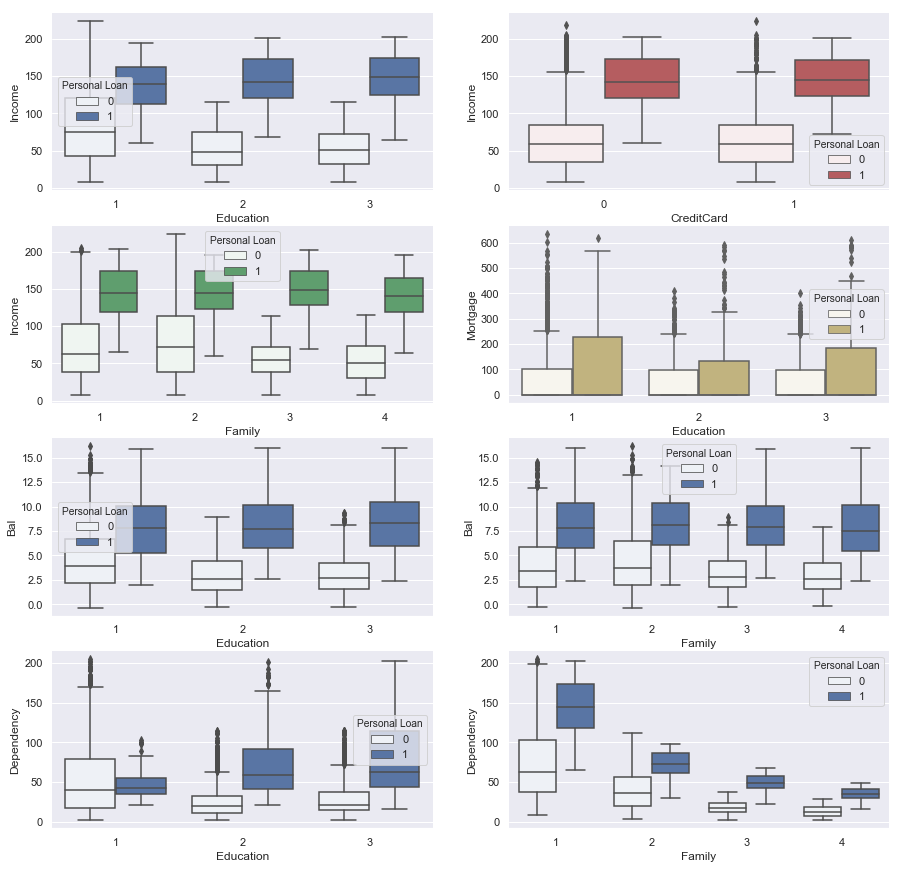

In [19]:
f, axes = plt.subplots(4,2, figsize=(15, 15))
sns.despine(left=True)
sns.boxplot(x="Education", y="Income", hue='Personal Loan',data=loan,color="b", ax=axes[0,0])
sns.boxplot(x="CreditCard", y="Income",hue='Personal Loan', data=loan, color="r", ax=axes[0,1])
sns.boxplot(x="Family", y="Income",hue='Personal Loan', data=loan, color="g", ax=axes[1,0])
sns.boxplot(x="Education", y="Mortgage",hue='Personal Loan', data=loan, color="y", ax=axes[1,1])
sns.boxplot(x="Education", y="Bal",hue='Personal Loan', data=loan, color="b", ax=axes[2,0])
sns.boxplot(x="Family", y="Bal",hue='Personal Loan', data=loan, color="b", ax=axes[2,1])
sns.boxplot(x="Education", y="Dependency",hue='Personal Loan', data=loan, color="b", ax=axes[3,0])
sns.boxplot(x="Family", y="Dependency",hue='Personal Loan', data=loan, color="b", ax=axes[3,1]);

> Observations from above Distribution(Boxplot). 
+ By comparing mean values of income at different education level we can say that income of undegraduate customer is higher  than that of graduate and professional customers.
+ We can clearly see that customers with higher income are most likely to go for personal loan.
+ Same we can observe with Income v/s Family graph. Income of customer having family size 1 and 2 is higher than that of customer having family size 3 and 4.
+ The above result can because there more number of undergraduate customer with family size 1 and 2.
+ Customer with higher mortgage seems to take personal loan.

> Observations from newly created features.
+ Customer who have more savings seem to more likely go for personal loan.
+ In general customers with high salary and less CCAvg opting Personal loan.
+ Customer with family size 1 and graduate and professional degree with higher range of dependency have opt for personal loan.

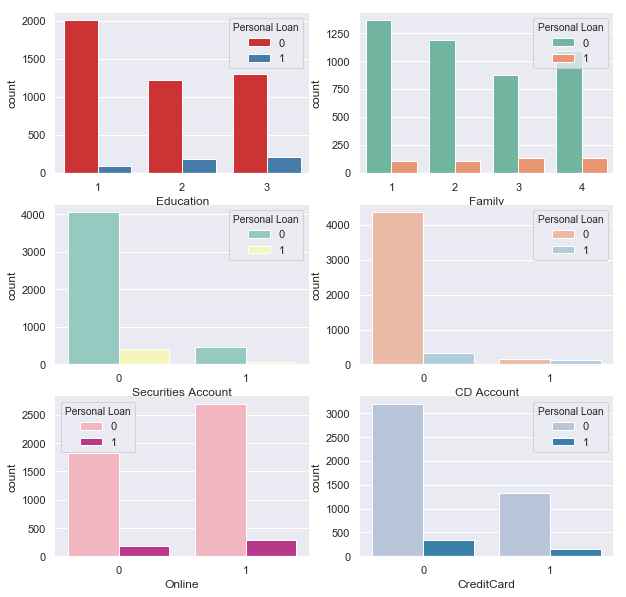

In [20]:
f, axes = plt.subplots(3,2, figsize=(10, 10))
sns.despine(left=True)
#print(loan.columns)
sns.countplot(x="Education",hue='Personal Loan', data=loan,ax=axes[0,0],palette='Set1')
sns.countplot(x="Family",hue='Personal Loan', data=loan,ax=axes[0,1],palette='Set2')
sns.countplot(x="Securities Account",hue='Personal Loan', data=loan,ax=axes[1,0],palette='Set3')
sns.countplot(x="CD Account",hue='Personal Loan', data=loan,ax=axes[1,1],palette='RdBu')
sns.countplot(x="Online",hue='Personal Loan', data=loan,ax=axes[2,0],palette='RdPu')
sns.countplot(x="CreditCard",hue='Personal Loan', data=loan,ax=axes[2,1],palette='PuBu')

### Observation from Categorical columns

- Family size and Education does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. Graduate(2)  and Advanced/Professional(3) customers are more likely to opt loan as compared other. When considering future campaign this might be good association.
- Majority of customers who does not have loan have securities account and CD account.
- Online and CreditCard column does not have much impact on Personal Loan.

### Distribution of Target Column

Personal Loan
0    4520
1     480
Name: CreditCard, dtype: int64


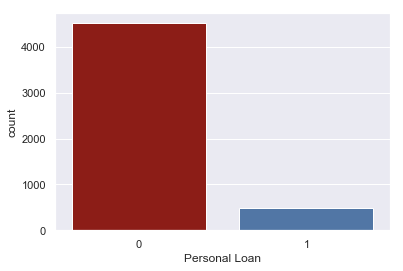

In [21]:
sns.countplot('Personal Loan', data= loan);
print(loan.groupby('Personal Loan').count()['CreditCard'])

* Out of 5000 customer very few customer have taken personal loan.
* only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

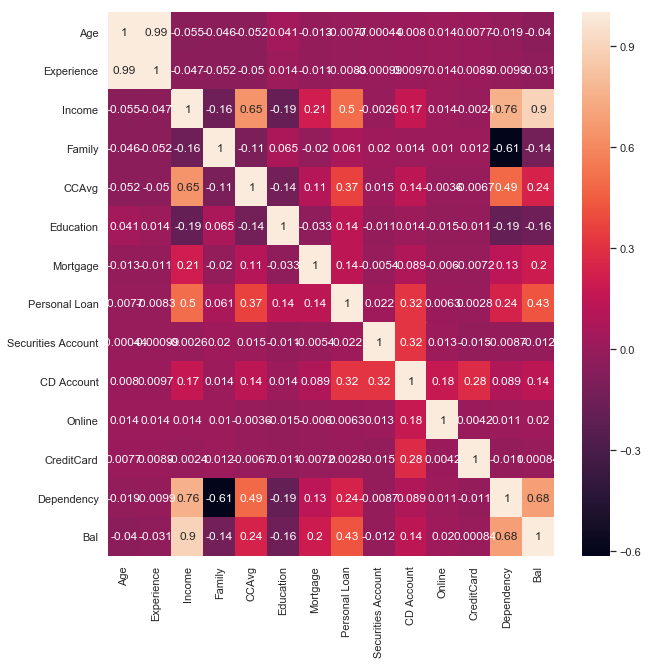

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(loan.drop(['ID', 'ZIP Code'], axis = 1).corr(),annot=True);

> + Maximum correlation between Age and Experience
> + Same can be obeserved in Bal, Dependency and Income

## We can use feature selection to filter out best feature to predict the likelihood of a liability customer buying personal loans.

In [23]:
col_x = loan.drop(['Personal Loan'],axis=1)
col_y = y = loan['Personal Loan']

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.30,random_state=20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

In [ ]:
#We will build KNN model with n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Build step forward feature selection
sfs1 = sfs(knn, k_features=15, forward=True, scoring='f1', cv=5)

+ **Number of feature for which we will get maximum f1 score, we select those feature for further model building.**

In [ ]:
# Perform step forward feature selection
sfs1 = sfs1.fit(scaledX_train, y_train)

In [ ]:
sfs1.get_metric_dict()

> * With all 15 feature the average **F1 score** is 69%.
* **If we reduce number of features then average F1 score is increasing, this leads to conclusion that not instead of taking all feature to build model we can use important features for building model.**
* from above SFFS learning we can see for feature number 3,5,6,7,13,14 we are getting maximum **F1 score** i.e. **90%**

In [ ]:
l = col_x.columns
l[[3,5,6,7,13,14]]

* these are the most important features for which we are getting maximum F1 score.
* We can go forwad and create model with these feature.

### Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [ ]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report
X=loan[['Income', 'Family', 'CCAvg', 'Education', 'Dependency', 'Bal']]
y=loan['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
print('Accuracy score for training set :', knn.score(scaledX_train,y_train)*100)
print('Accuracy score for testing set :', knn.score(scaledX_test,y_test)*100)
pred=knn.predict(scaledX_test)
print('Confusion Matrix : ')
print(confusion_matrix(y_test,pred))
print('classification_report : ')
print(classification_report(y_test,pred))
print('Recall Score : ', recall_score(y_test,pred))
print('Precision Score : ', precision_score(y_test,pred))

### Above K-NN model with n-neighbors = 3 is having accuracy score of (test accuracy = 98% and train accuracy = 99) and F1 score = 92% .

### Above model is having better F1 score so that recall and precision score i.e. 92%

## Using feature selection to filter out best feature to predict the likelihood of a liability customer buying personal loans for Logistic Regression model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.30,random_state=20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
logr = LogisticRegression()
sfs1 = sfs(logr, k_features=15, forward=True, scoring='f1', cv=5)
sfs1 = sfs1.fit(scaledX_train, y_train)
sfs1.get_metric_dict()

> * We can get maximum **F1 score** if we used either 10,11,12,13 feature instead of all features. Obeservation can lead us to use 11 feature to get maximum **F1 score**.
* from above SFFS learning we can see for feature number 0, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14 we are getting maximum **F1 score** i.e. **71.36%**

In [ ]:
l = col_x.columns
l[[0, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14]]

In [ ]:
X = loan[['ID', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Dependency', 'Bal']]
y = loan['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=25)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
#create an instance and fit the model 
logr = LogisticRegression()
logr.fit(scaledX_train, y_train)
#predictions
log_pred = logr.predict(scaledX_test)
print('Accuracy score for training set :', logr.score(scaledX_train,y_train)*100)
print('Accuracy score for testing set :', logr.score(scaledX_test,y_test)*100)
log_pred=logr.predict(scaledX_test)
print('Confusion Matrix : ')
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print('Recall Score : ', recall_score(y_test,log_pred))
print('Precision Score : ', precision_score(y_test,log_pred))

### Above Logostic regression model is having accuracy score of (test accuracy = 95% and train accuracy = 94%) and F1 score = 72% .

## Using feature selection to filter out best feature to predict the likelihood of a liability customer buying personal loans for Naive Bayes model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.30,random_state=20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
gb = GaussianNB()
sfs1 = sfs(gb, k_features=15, forward=True, scoring='f1', cv=5)
sfs1 = sfs1.fit(scaledX_train, y_train)
sfs1.get_metric_dict()

> * We can get maximum **F1 score** if we use 9 feature instead of all features.
* from above SFFS learning we can see for feature number 1, 3, 4, 5, 7, 9, 11, 12, 14 we are getting maximum **F1 score** i.e. **51.19%**

In [ ]:
l = col_x.columns
l[[1, 3, 4, 5, 7, 9, 11, 12, 14]]

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Spliting the data 
X = loan[['Age', 'Income', 'ZIP Code', 'Family', 'Education',
       'Securities Account', 'Online', 'CreditCard', 'Bal']]
y = loan['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
gb = GaussianNB()
gb.fit(scaledX_train, y_train)
# making predictions
gb_pred = gb.predict(scaledX_test)
print('Accuracy score for training set :', gb.score(scaledX_train,y_train)*100)
print('Accuracy score for testing set :', gb.score(scaledX_test,y_test)*100)
print('Confusion Matrix : ')
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print('Recall Score : ', recall_score(y_test,gb_pred))
print('Precision Score : ', precision_score(y_test,gb_pred))

### Above Naive bayes model is having accuracy score of (test accuracy = 87.53% and train accuracy = 87.71%) and F1 score = 55% .

> By comparing all the metrics such as accuracy score, F1 score(recall and precision score) for all models(K-NN, Logistic regression and Naive bayes model) **K-NN** seems to be good model to predict the likelihood of a liability customer buying personal loans.

In [ ]:
neighbors = np.arange(1, 10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
X=loan[['Income', 'Family', 'CCAvg', 'Education', 'Dependency', 'Bal']]
y=loan['Personal Loan']
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### So as conclusion our K-NN model with n-neighbors = 3 is the best model to predict the likelihood of a liability customer buying personal loans. We can prove this with above train and test accuaracy comparison.